In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3555, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 11,1.80,8079.0,8.0,5.0,2,1.0,Moderately Old,2476.0,0,0,0,0,0,0,0
1,house,vipul world,sector 48,3.35,5583.0,6.0,5.0,3+,3.0,Moderately Old,6000.0,0,0,0,0,0,0,53
2,flat,parsvnath exotica,sector 53,4.80,14679.0,3.0,4.0,3+,12.0,New Property,2895.0,0,0,0,0,0,0,69
3,flat,signature global the millennia 3,sector 37d,0.45,7627.0,2.0,3.0,2,8.0,Relatively New,656.0,0,0,0,0,0,0,8
4,house,spaze privy,sector 72,3.10,8486.0,5.0,5.0,3+,21.0,Relatively New,3653.0,0,0,0,0,0,0,0


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,sector 11,1.80,8.0,5.0,2,1.0,Moderately Old,2476.0,0,0,0,0,0,0,0
1,house,sector 48,3.35,6.0,5.0,3+,3.0,Moderately Old,6000.0,0,0,0,0,0,0,53
2,flat,sector 53,4.80,3.0,4.0,3+,12.0,New Property,2895.0,0,0,0,0,0,0,69
3,flat,sector 37d,0.45,2.0,3.0,2,8.0,Relatively New,656.0,0,0,0,0,0,0,8
4,house,sector 72,3.10,5.0,5.0,3+,21.0,Relatively New,3653.0,0,0,0,0,0,0,0


<Axes: >

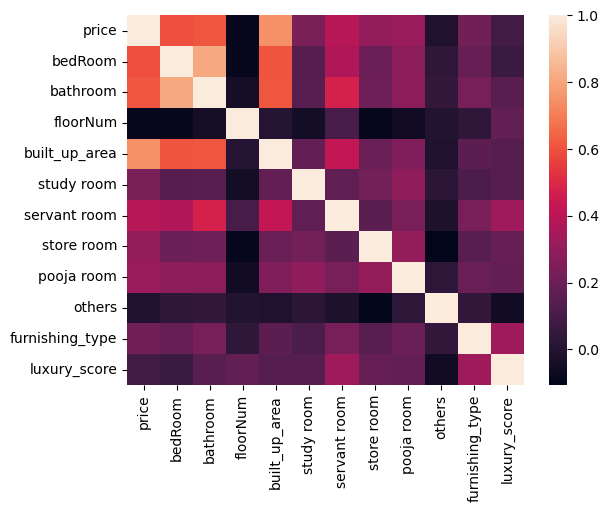

In [9]:

numeric_df = train_df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr())

In [11]:
numeric_df = train_df.select_dtypes(include='number')
numeric_df.corr()['price'].sort_values(ascending=False)

price              1.000000
built_up_area      0.748565
bathroom           0.609810
bedRoom            0.591242
servant room       0.391745
pooja room         0.319744
store room         0.305599
study room         0.242848
furnishing_type    0.213668
luxury_score       0.091362
others            -0.013124
floorNum          -0.087434
Name: price, dtype: float64

In [12]:
# cols in question

# numerical -> luxury_score, others, floorNum
# categorical -> property_type, sector, agePossession